In [1]:
import pandas as pd

In [2]:
students = pd.read_csv("estudiantesCCOMcursos.csv", 
                           dtype='str', 
                           header=None, 
                           names=["ID", "Semester", "Course"])

In [3]:
students.iloc[:5,1:3]

,Semester,Course
0,921,BIOL3011
1,921,CISO3122
2,921,MATE3171
3,921,QUIM3001
4,922,ESPA3101


In [4]:
sequences = {}

In [5]:
for index, ID, Semester, Course in students.itertuples():
    if ID not in sequences:
        sequences[ID] = [(Course, Semester)]
    else:
        sequences[ID].append((Course, Semester))

In [6]:
int('A', base=16)


10

In [7]:
def codetonum(code):
    decade = code[0] 
    year = code[1]
    semester = code[2]
    time = 1900 + int(decade, base=16) * 10 + int(year) + 0.5 * (int(semester) - 1)
    return time

In [8]:
codetonum("A81")

2008.0

In [9]:
codetonum("A82")

2008.5

In [10]:
def relative(courses):
    "Read a list of course, semester tuples and write out timeline"
    course, start = courses[0]
    first_sem = codetonum(start)
    last_sem = 0
    sequence = []
    for course, semester in courses:
        now = codetonum(semester)
        if now != last_sem:
            last_sem = now
            increment = 0.0
        else:
            increment += 0.01
        
        elapsed = now-first_sem + increment
        sequence.append((course, elapsed))
    return sequence

In [11]:
len(sequences.keys())

476

In [12]:
conf = open("config.map", "w")
for student in sequences.keys():
    conf.write("%s 1 %s.map\n" % (student, student))
    f = open(student + ".map", "w")
    f.write("group L0\n;BEGINOFGROUP\n")
    for course, elapsed in relative(sequences[student]):
        f.write("%s\t%s\n" % (course, elapsed))
    f.write(";ENDOFGROUP\n")
    f.close()
conf.close()

In [13]:
courses = []
for student in sequences.keys():
    courses.append([course for course, semester in sequences[student]])

In [14]:
common = set(courses[0])
for courselist in courses[1:]:
    common = common.intersection(courselist)

In [15]:
common

set()

In [16]:
core = set(['CCOM3020',
                'MATE3018',
                'MATE3023',
                'MATE3024',
                'MATE3151',
                'MATE3152',
                'MATE3153',
                'MATE4080',
                'MATE5001',
                'CCOM3981',
                'CCOM3982',
                'CCOM3030',
                'CCOM3033',
                'CCOM3034',
                'CCOM3986',
                'CCOM4017',
                'CCOM4027',
                'CCOM4029',
                'CCOM4030'
                'CCOM4065',
                'CCOM4086',
                'CCOM4087',
                'CCOM4088',
                'CCOM4205',
                'CCOM4995',
                'CCOM4996',
                'CCOM5035',
                'CCOM5050',
                'CCOM5060'])

In [61]:
prog2011 = ['MATE3018', 'MATE3023', 'MATE3024', # should have tested out of these pre calc
            'MATE3151', 'CCOM3030', 'CCOM3981', # espa soc eng
            'CCOM3020', 'CCOM3033', 'CCOM3982', # soc espa eng
            'MATE3152', 'CCOM3034', 'CCOM4016', 'CCOM4086', # sci huma
            'MATE4081', 'MATE4032', 'CCOM4027', 'CCOM4029', # sci huma
            'MATE4080', 'CCOM4017', 'CCOM4030', # libre lite
            'CCOM5050', 'CCOM4065', 'CCOM4205', # art lite
            'MATE5001', 'CCOM5035', 'CCOM4995', # SCI SCI
            'CCOM4996', 'CCOM4087']

In [62]:
prog2016 = ['MATE3018', 'MATE3023', 'MATE3024', # should have tested out of these pre calc
            'MATE3151', 'CCOM3030', 'CCOM3981', # espa soc eng
            'CCOM3020', 'CCOM3033', 'CCOM3982', # soc espa eng
            'MATE3152', 'CCOM3034', 'CCOM4086', # sci huma
            'MATE4081', 'MATE4032', 'CCOM4027', 'CCOM4029', # sci huma
            'MATE4080', 'CCOM4017', 'CCOM4030', # libre lite
            'CCOM5050', 'CCOM4065', 'CCOM4205', # art lite
            'MATE5001', 'CCOM5035', 'CCOM4995', # SCI SCI
            'CCOM4996', 'CCOM4087']

In [18]:
def clean(students, core):
    "Filter students to make sure they took all core courses"
    clean = {}
    for student, courselist in students.items():
        cleanlist = []
        for course, sem in courselist:
            if course in core:
                cleanlist.append((course, sem))
        if len(cleanlist) > 0:
            clean[student] = cleanlist
    return clean

In [19]:
newstu = clean(sequences, core)

In [20]:
len(newstu.keys())

453

In [21]:
def writemaps(students):
    #conf = open("config.map", "w")
    for student in students.keys():
        #conf.write("%s 1 %s.map\n" % (student, student))
        f = open(student + ".map", "w")
        #f.write("group L0\n;BEGINOFGROUP\n")
        for course, elapsed in relative(students[student]):
            f.write("%s\t%s\n" % (course, elapsed))
        #f.write(";ENDOFGROUP\n")
        f.close()
    #conf.close()

In [22]:
writemaps(newstu)

In [23]:
import networkx as nx
from networkx.drawing.nx_pydot import write_dot

In [24]:
def writedot(students, name):
    G = nx.MultiDiGraph()

    for student in students.keys():
        courses = relative(students[student])
        source, startsem = courses[0]
        for sink, elapsed in courses[1:]:
            G.add_edge(source, sink)
            source = sink
            
    write_dot(G, name)

In [25]:
writedot(sequences, "file.dot")

In [26]:
writedot(newstu, "newstu.dot")

In [27]:
import sys
sys.executable

'/Users/humberto/anaconda3/bin/python'

In [28]:
sys.path

['',
 '/Users/humberto/anaconda3/lib/python36.zip',
 '/Users/humberto/anaconda3/lib/python3.6',
 '/Users/humberto/anaconda3/lib/python3.6/lib-dynload',
 '/Users/humberto/anaconda3/lib/python3.6/site-packages',
 '/Users/humberto/anaconda3/lib/python3.6/site-packages/Sphinx-1.5.6-py3.6.egg',
 '/Users/humberto/anaconda3/lib/python3.6/site-packages/aeosa',
 '/Users/humberto/anaconda3/lib/python3.6/site-packages/setuptools-27.2.0-py3.6.egg',
 '/Users/humberto/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/humberto/.ipython']

In [29]:
stutest = {'a' : 1, 'b' : 3, 'c':2}

In [30]:
sorted(stutest.items(), key=lambda item: (item[1], item[0]))

[('a', 1), ('c', 2), ('b', 3)]

In [31]:
?sorted

In [32]:
from collections import defaultdict

In [33]:
def getseq(students):
    freqs = defaultdict(int)
    for student in students.keys():
        for i in range(len(students[student])):
            course, elapsed = students[student][i]
            freqs[course] += i
    return list(map(lambda item: item[0], sorted(freqs.items(), key=lambda item: (item[1], item[0]))))

In [34]:
?map

In [35]:
cs_seq = getseq(newstu)

In [36]:
cs_seq

['MATE3018',
 'CCOM5060',
 'CCOM3030',
 'CCOM4205',
 'CCOM4996',
 'MATE3024',
 'CCOM3981',
 'CCOM4088',
 'MATE3153',
 'CCOM3982',
 'MATE5001',
 'CCOM4029',
 'CCOM3020',
 'CCOM3033',
 'CCOM3034',
 'MATE3151',
 'CCOM4086',
 'CCOM4017',
 'CCOM4027',
 'CCOM3986',
 'CCOM5035',
 'MATE3152',
 'CCOM4995',
 'MATE4080',
 'CCOM4087',
 'CCOM5050']

In [37]:
import numpy as np

In [38]:
rows = len(cs_seq)
counts = np.zeros(rows * rows).reshape(rows,rows)

In [39]:
len(newstu)

453

In [40]:
for stu in newstu:
    courses = [course for course, sem in newstu[stu] if course in cs_seq]
    courses = list(dict.fromkeys(courses)) # unique, preserving order, first occurrence
    for i in range(len(courses)):
        row = cs_seq.index(courses[i])
        counts[row,i] += 1

In [41]:
counts = pd.DataFrame(counts, index=cs_seq)

In [42]:
%matplotlib inline

In [43]:
import seaborn as sns; sns.set()

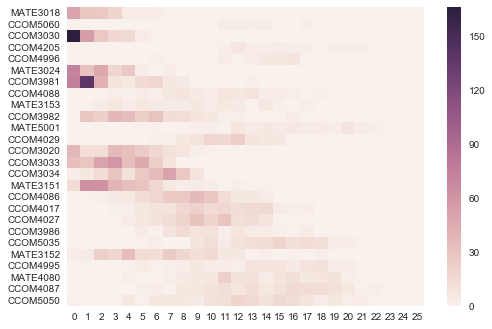

In [44]:
ax = sns.heatmap(counts)

In [45]:
def heatmap(students, cs_seq):
    rows = len(cs_seq)
    cols = 17
    counts = np.zeros(rows * cols).reshape(rows,cols)
    counts = pd.DataFrame(counts, index=cs_seq)
    for stu in students:
        courses = [(course, sem) for course, sem in students[stu] if course in cs_seq]
        #print(courses)
        courses = semesters(courses)
        for i in range(len(courses)):
            course, sem = courses[i]
            #print(course)
            row = cs_seq.index(course)
            if sem >= cols:
                sem = cols-1
            counts.iat[row,sem] += 1
    return counts

In [46]:
def codetosem(code):
    decade = code[0] 
    year = code[1]
    semester = code[2]
    time = 1900 + int(decade, base=16) * 10 + int(year) + 0.5 * (int(semester) - 1)
    return time

In [47]:
def semesters(courses):
    "Read a list of course, semester tuples and write out relative timeline"
    course, start = courses[0]
    first_sem = codetosem(start)
    last_sem = 0
    sequence = []
    for course, semester in courses:
        now = codetonum(semester)
        
        elapsed = now-first_sem
        elapsed *= 2
        sequence.append((course, int(elapsed)))
    return sequence

In [49]:
newmap = heatmap(newstu, cs_seq)

In [50]:
counts[21][0]

0.0

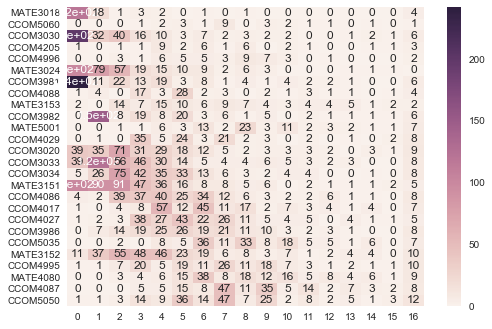

In [66]:
ax = sns.heatmap(newmap, annot=True)

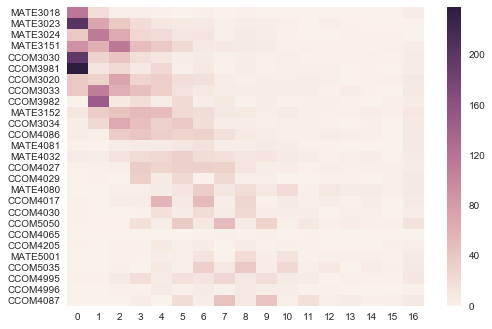

In [67]:
ax = sns.heatmap(heatmap(clean(sequences, prog2016), prog2016),cmap = None)

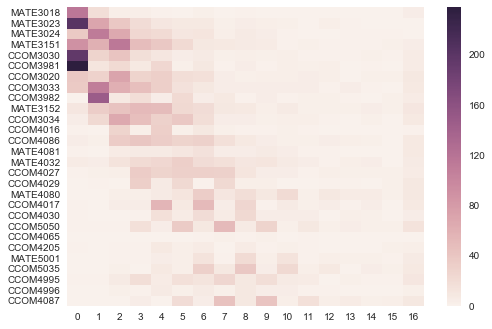

In [68]:
ax = sns.heatmap(heatmap(clean(sequences, prog2011), prog2011),cmap = None)

CCOM4016 was a pre-requisite for CCOM4086 until 2011. What is now MATE4081 was MATE4032 until two years ago.